In [10]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# make some data
np.random.seed(1)
fs = 20. # Hz sampling frequency
Tt = 3.    # s total sampling time
t  = np.arange(0, Tt, 1 / fs)
y  = 5 * t**2 + 2 * t + 3
n = np.random.normal(0, 10, size=len(t))
data = y + n

In [28]:
def plot_fit(data, order, a, b, c):
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    plt.plot(t, data, 'ko', ms=5.) # these are the raw data
    
    if order == 'linear':
        fity = a * t + b
        eqn_str = '$y = %d x + %d$' % (a, b)
    elif order == 'quadratic':
        fity = a * t**2 + b * t + c
        eqn_str = '$y = %d x^2 + %d x + %d$' % (a, b, c)
        
    error = ((data - fity)**2).sum()
    err_str = 'error $= %d$' % error
        
    plt.plot(t, fity, 'r-', ms=5., lw=3.) # these are the fitted data
    plt.text(0.1, 0.9, eqn_str, transform=ax.transAxes, fontsize=12)
    plt.text(0.1, 0.8, err_str, transform=ax.transAxes, fontsize=12)

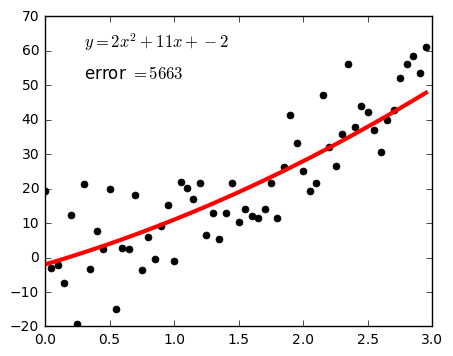

In [29]:
interact(plot_fit, data=fixed(data), order=['linear', 'quadratic'], a=(-25,25), b=(-25, 25), c=(-25, 25))